In [155]:
from src.radiation_algorithm.radiation_algorithm import *
from rwg.rwg6 import plot_surface_current_distribution
from efield.efield1 import calculate_electric_magnetic_field_at_point
from efield.efield2 import radiation_intensity_distribution_over_sphere_surface
from efield.efield3 import antenna_directivity_pattern

In [156]:
def traitement_de_(filename):
    base_name = os.path.splitext(os.path.basename(filename))[0]
    print(f"Traitement de l'antenne {base_name}")

In [157]:
# filename_mesh1_IFA = 'data/antennas_mesh/IFA.mat'
filename_mesh1_IFA = 'data/antennas_mesh/IFA2.mat'

In [158]:
# Mesure du temps de début
start_time = time.time()

# feed_point_IFA = [0.016, 0.046, 0]
# feed_point_IFA = [0.004, 0.035, 0]
feed_point_IFA = [0.016, 0.035, 0]
voltage_amplitude = 1  # Valeur de l'amplitude égale à 1 volt

traitement_de_(filename_mesh1_IFA)
radiation_algorithm(filename_mesh1_IFA, 2.4e9, feed_point_IFA, voltage_amplitude, load_from_matlab=False)

elapsed_time = time.time() - start_time
print(f"Temps écoulé pour le traitement de l'antenne étudiée : {elapsed_time:.6f} secondes")
print('\n')

Traitement de l'antenne IFA2
length of antenna IFA2 = 0.04 meter
width of antenna IFA2 = 0.05 meter
height of antenna IFA2 = 0.0 meter
Total numbers of Edges is = 375
Aucune jonction complexe trouvée....
Total numbers of Edges is = 375
Total numbers of Edges is = 375
edges lenght shape = (375,)
point shape = (3, 165)
triangle shape = (4, 270)
triangle plus shape = (375,)
triangle minus shape = (375,)
edges lenght shape = (375,)
Data saved successfully to data/antennas_mesh1/IFA2_mesh1.mat
Data saved successfully to data/antennas_mesh2/IFA2_mesh2.mat
Temps écoulé pour le calcul de la matrice Z : 0.212495 secondes
Data saved successfully to data/antennas_impedance/IFA2_impedance.mat
Data loaded from data/antennas_mesh2/IFA2_mesh2.mat
Data loaded from data/antennas_impedance/IFA2_impedance.mat
index_feeding_edges near to the feed_point = 18
La valeur de l'impédance d'entrée de l'antenne IFA2 =  51.8112783 + 189.0150560i Ohm
Gap current of IFA2 = (0.0013488621350855822-0.004920844656546739

Temps écoulé pour le traitement de l'antenne étudiée : 1.599915 secondes




Data loaded from data/antennas_mesh2/IFA2_mesh2.mat


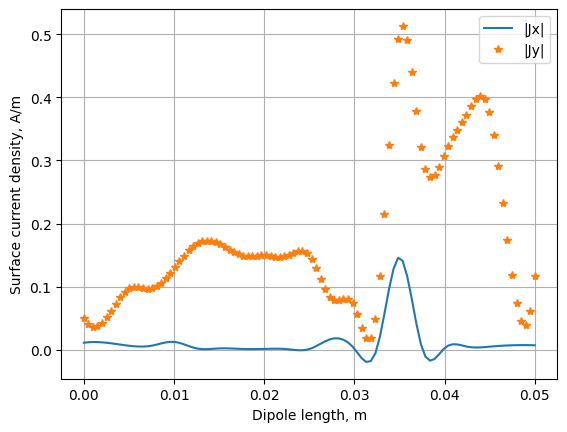

In [159]:
filename_mesh2_IFA= 'data/antennas_mesh2/IFA2_mesh2.mat'
filename_current_IFA = 'data/antennas_current/IFA2_current.mat'

plot_surface_current_distribution(filename_mesh2_IFA, filename_current_IFA, radiation=True)

In [160]:
filename_gain_power_IFA = 'data/antennas_gain_power/IFA2_gain_power.mat'
filename_sphere_dense = 'data/sphere_mesh/sphere_dense.mat'

In [161]:
# Point d'observation pour le calcul des champs
observation_point = np.array([0, 0, 10])

# Étape 1 : Calcul du champ électrique et magnétique à un point donné
print("Calculating electric and magnetic fields at observation point...")
calculate_electric_magnetic_field_at_point(filename_mesh2_IFA, filename_current_IFA, observation_point, radiation=True)

Calculating electric and magnetic fields at observation point...
Data loaded from data/antennas_mesh2/IFA2_mesh2.mat

Frequency = 2400000000.0 Hz
Longueur d'onde lambda = 0.12489681415858718 m
Le point d'observation est : [ 0  0 10]

e_field_total of IFA2 at the observation point [ 0  0 10] is :
 0.0058643 - 0.0018349i V/m
 0.0175757 - 0.0129156i V/m
 0.0000662 - 0.0000315i V/m

h_field_total of IFA2 at the observation point [ 0  0 10] is :
-0.0000466 + 0.0000343i A/m
 0.0000156 - 0.0000049i A/m
 0.0000001 + 0.0000001i A/m

Poynting vector is equal to : 
-0.000000 W/m^2
-0.000000 W/m^2
 0.000001 W/m^2

w = 6.813948552201907e-07 W/m^2

u = 6.813948552201907e-05 W/unit solid angle


In [162]:
# Étape 2 : Distribution de l'intensité du rayonnement sur une sphère
print("Calculating radiation intensity distribution over sphere surface...")
radiation_intensity_distribution_over_sphere_surface(filename_mesh2_IFA, filename_current_IFA, filename_sphere_dense, radiation=True)

Calculating radiation intensity distribution over sphere surface...
Data loaded from data/antennas_mesh2/IFA2_mesh2.mat

Frequency = 2400000000.0 Hz
Longueur d'onde lambda = 0.12489681415858718 m

Total Power :  0.000704
Gain Linear :  1.746248
Gain Logarithmic :  2.421058 dB
Radiation Resistance :  54.051508 Ohms
Data saved successfully to data/antennas_gain_power/IFA2_gain_power.mat


Generating antenna directivity pattern...
Data loaded from data/antennas_mesh2/IFA2_mesh2.mat
Data loaded from data/antennas_gain_power/IFA2_gain_power.mat


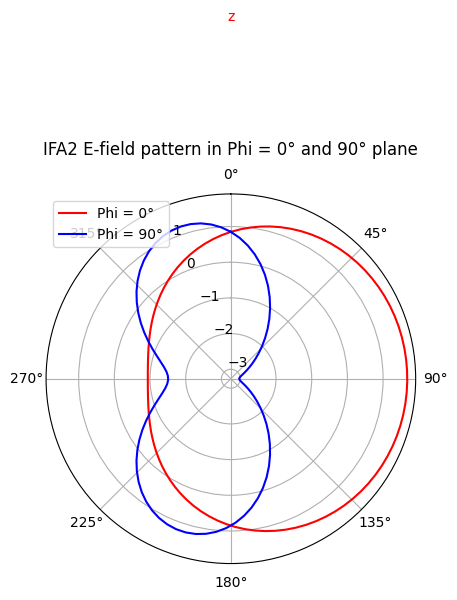

In [163]:
# Étape 3 : Génération du diagramme de directivité
print("Generating antenna directivity pattern...")
antenna_directivity_pattern(filename_mesh2_IFA, filename_current_IFA, filename_gain_power_IFA, radiation=True)